## 1. Introduction

Healthcare costs keep increasing in the US for several decades. According to The Centers for Medicare & Medicaid Services, the national health expenditure increased 9.7% ($4.1 Trillion) in 2020 and is projected to grow by 5.4% annually [1. CMS, 2020]. Other than government policy, there are many factors contributing to the rise of healthcare costs. The Journal of the American Medical Association conducted a study and concluded that population growth, population aging, disease prevalence or incidence, service utilization, and service price and intensity are the factors affecting healthcare costs [2. JAMA, 2017].

Private health insurance premiums are also showing the same trend. The Peterson-Kaiser Family Foundation analysed data from 72 private insurers from 13 states in the US and found that the premiums will increase 10% by 2023 [3. Peterson-KFF, 2022]. These factors lead me to analyse personal data from people across the country and build a deep learning model to predict the individual medical costs billed by the insurer.

## 2. Define a problem

The JAMA'S study [reference 2] showed that population growth, age, disease prevalence etc, are among the factors affecting healthcare costs. Based on this study, this project needs a dataset of individuals from different parts of the US to build the model. As the medical cost is a scalar, this is a scalar regression problem. Our dataset should have features like age, sex and region, individual medical costs etc, to even consider building a predictive model. Our research identified such a dataset, and it is described in section 3.

### 2.1 Hypothesis

We hypothesise that the individual's age, sex, BMI, smoking habit, and region data can be used to predict the medical costs billed by the insurer.

## 3. Objectives

Use deep neural networks to build a model that can train on the given data and predict the medical costs of the individual on the unseen data. It should be an ideal model that should not underfit or overfit the training data. Even if other ML models offer a better result, use deep neural networks to build the baseline and main models.

**Out of scope**

Any machine learning methods other than deep neural networks.

## 4. Dataset

Extensive research has been done to identify an ideal dataset for the investigation. Many of the US medical cost datasets available were not balanced. The Medical Cost Personal Datasets on Kaggle by Miri Choi came to attention at this point [3]. It is available under the Database Contents License (DbCL) v1.0 license [4]. Kaggle has a good reputation among data scientists. This dataset has a usability score of 8.8 (calculated by Kaggle), 1880 upvotes, and 889 Notebooks using it for analysis. There is enough evidence on the quality of the dataset and the reliability of the source to select this dataset for our investigation.

The dataset is available in CSV format. It has stored the features of 1338 individuals. The features include age, sex, BMI, number of children, smoker or not, region, and medical charges. After removing the duplicates, there are 662 female and 675 male samples. 325 individuals are from the southwest region, 364 from the southeast, and 324 from the northwest and northeast. Based on these numbers, the dataset selected is well balanced to investigate the medical cost problem. The number of smokers in the dataset is less than non smokers, and it makes the dataset more realistic.

### 4.1 Preprocessing

The preprocessing step is part of the data preparation for machine learning. We remove duplicate and empty data samples and do other manipulations to improve the quality of the dataset without losing the core features.

In [1]:
# import pandas and csv libraries
import pandas as pd
import csv

Read the csv data into a python dataframe for further analysis.

In [2]:
# read the csv data and print the first 5 rows
medical_data = pd.read_csv("insurance.csv")
medical_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# check the shape of the dataset
medical_data.shape

(1338, 7)

Use the python dataframe's describe() method to do descriptive statistical analysis on the numerical columns in the dataset.

In [4]:
# generate descriptive stats
medical_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Check for any null values in the columns.

In [5]:
# check for null or empty values
medical_data.isna().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

There is no null or empty value in the columns. Let's now check if there are any duplicates in the data samples.

In [6]:
# check for duplicate values
medical_data.duplicated().any()

True

The result shows our dataset contains duplicate rows, let's print the duplicate row.

In [7]:
# show duplicate data
medical_data[medical_data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


Drop the duplicate row and make sure we keep one instance of it.

In [8]:
# drop the duplicate by keeping only one instance of it
medical_data_updated = medical_data.drop_duplicates(subset=None, keep='first', inplace=False)

In [9]:
# check for duplicates
medical_data_updated.duplicated().any()

False

In [10]:
# reset the index after removing the duplicates
medical_data_updated.reset_index(inplace=True)

In [11]:
# drop the old index in colmn one and save the updated dataset 
medical_data_updated = medical_data_updated.drop(medical_data_updated.columns[[0]], axis=1)

Our dataset has population data of males and females from different regions. A balanced dataset is very important for our predictive analysis. Let's check how balanced the dataset is.

In [12]:
# show the available regions
medical_data_updated['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [13]:
# check the samples of females
medical_data_updated.loc[medical_data_updated['sex'] == 'female'].shape

(662, 7)

In [14]:
# check the samples of male population
medical_data_updated.loc[medical_data_updated['sex'] == 'male'].shape

(675, 7)

In [15]:
# check the population from the southwest
medical_data_updated.loc[medical_data_updated['region'] == 'southwest'].shape

(325, 7)

In [16]:
# check the population from the southeast
medical_data_updated.loc[medical_data_updated['region'] == 'southeast'].shape

(364, 7)

In [17]:
# check the population from the northwest
medical_data_updated.loc[medical_data_updated['region'] == 'northwest'].shape

(324, 7)

In [18]:
# check the population from the northeast
medical_data_updated.loc[medical_data_updated['region'] == 'northeast'].shape

(324, 7)

The above numbers show that the dataset is well balanced, let's draw simple bar charts to visualise the dataset.

In [19]:
#3 import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

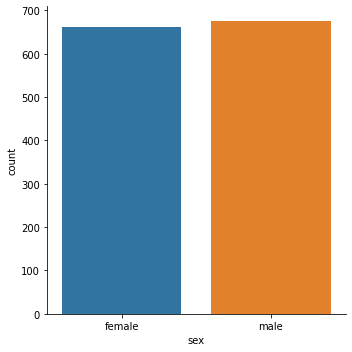

In [20]:
# plot the gender based population data
sns.catplot(x='sex', kind='count', data=medical_data_updated)

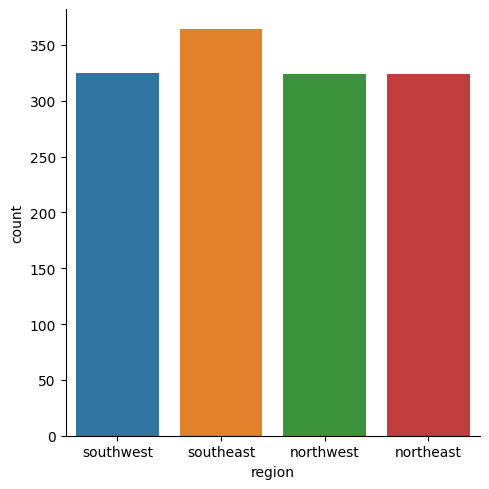

In [21]:
# plot region based samples
sns.catplot(x='region', kind='count', data=medical_data_updated)

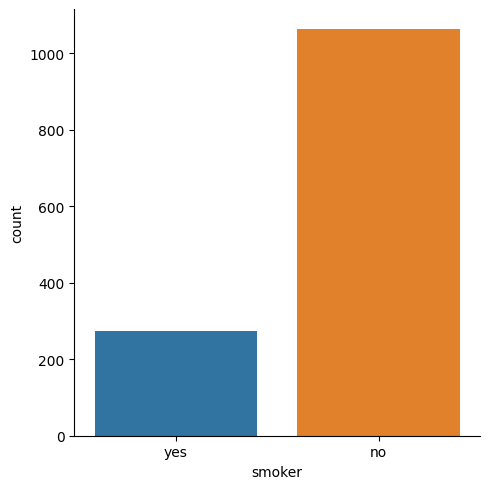

In [22]:
# plot smokers and non smokers
sns.catplot(x='smoker', kind='count', data=medical_data_updated)

The bar charts show that the gender and region-based data samples are well balanced. And the smoker's data samples are the reflection of the reality in many groups of people.

## 4. Measure of success and evaluation

### 4.1 MSE and MAE

This project is dealing with a regression problem, and regression uses a different loss function and evaluation metrics. The mean squared error (MSE) is the common regression loss function. It is the average of the square of errors (the difference between the predicted and actual target). The MSE will be always a positive value. 

The mean average error (MAE) is used as the evaluation metrics to measure the quality of the deep learning model. It is the mean of the absolute difference between the actual and predicted values. Like the MSE, the MAE will be always a positive value.

### 4.2 Hold-out validation

We split the dataset into training, validation and test set of 80%, 10%, and 10% respectively. And use 10% of the data for validating the model after training. The validation loss and metrics (MAE) will be helpful to identify the balance between underfitting and overfitting. This technique is vulnerable to statistical fluctuations if the dataset is small.

### 4.3 K-Fold validation

The K-Fold validation is ideal for small datasets. It splits the training data into K equal folds, instantiates the model and trains on the remaining folds other than the validation fold. This process continues until every fold becomes a validation fold. Our dataset only got 1337 samples, it is not a very small dataset, still, we can use k-fold validation to validate the performance of our deep learning model. 

## 5. Methodology

### 5.1. Prepare the data

The 'sex', 'smoker', and 'region' columns in the dataset contain categorical data. We need numerical input (tensor) for our deep learning model. We use python DataFrame's get_dummies() method to convert categorical data to indicator variables (dummy codes).

In [23]:
# categorical to numeric mapping
pd.get_dummies(medical_data_updated, columns=['sex', 'smoker', 'region']).head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


Now we can see that new columns are added to the dataset with numerical values (0s and 1s).

In [24]:
# save the new dataframe
df_med_data = pd.get_dummies(medical_data_updated, columns=['sex', 'smoker', 'region'])

In [25]:
# check the new dataframe
df_med_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [26]:
# import numpy scikit learn libraries
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler

### 5.2 Normalisation

We need the dataset values in the same range to make the deep learning model work better. Inhomogeneity can trigger larger gradient updates and models biased towards larger numerical features. We normalise the dataset using scikit learn's StandardScaler. The StandardScaler standardize the dataset and normally distribute the data with zero mean and unit variance.

**The l1 and l2 regularizers assume that the input data is normalised with zero mean and unit variance. This step will help us to add regularizers to our deep learning model in the later stage.**

In [28]:
# normalise [-1,1] mean 0, std 1 - sandard scalar
scale = StandardScaler()
# scale the data
scale_model = scale.fit(df_med_data)
# store the transformed data
array_med_scaled = scale_model.transform(df_med_data)

In [29]:
# check the output array
array_med_scaled[:2]

array([[-1.44041773, -0.45315959, -0.90923416,  0.2978567 ,  1.00977099,
        -1.00977099, -1.96966039,  1.96966039, -0.5655458 , -0.5655458 ,
        -0.61163774,  1.76460935],
       [-1.51164747,  0.50942165, -0.07944162, -0.9543806 , -0.99032355,
         0.99032355,  0.50770174, -0.50770174, -0.5655458 , -0.5655458 ,
         1.63495472, -0.56669767]])

In [30]:
# check the shape and confirm no data is lost
array_med_scaled.shape

(1337, 12)

In [31]:
# convert the array back to a dataframe
df_med_scaled = pd.DataFrame(array_med_scaled, columns=df_med_data.columns)

In [32]:
# check the normalized dataframe
df_med_scaled.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,0.297857,1.009771,-1.009771,-1.969660,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.509422,-0.079442,-0.954381,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.383155,1.580143,-0.729373,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-1.305052,-0.909234,0.719104,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.292456,-0.909234,-0.777499,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698


In [33]:
df_med_scaled.shape

(1337, 12)

We have successfully normalised the data. The next step is to split the DataFrame to train and test sets.

### 5.3 Train test split

Let's use the scikit learn's train_test_split method to train and test subsets. Here we set a random_state parameter to reproduce the same result for later runs.

In [34]:
# import the library
from sklearn.model_selection import train_test_split

Let's drop the target value column 'charges' from the dataset and keep it in a series named 'target'.

In [35]:
# drop the target column
data = df_med_scaled.drop('charges', axis=1)
data.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.440418,-0.453160,-0.909234,1.009771,-1.009771,-1.969660,1.969660,-0.565546,-0.565546,-0.611638,1.764609
1,-1.511647,0.509422,-0.079442,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
2,-0.799350,0.383155,1.580143,-0.990324,0.990324,0.507702,-0.507702,-0.565546,-0.565546,1.634955,-0.566698
3,-0.443201,-1.305052,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698
4,-0.514431,-0.292456,-0.909234,-0.990324,0.990324,0.507702,-0.507702,-0.565546,1.768203,-0.611638,-0.566698


In [36]:
# store the target in a series 
target = df_med_scaled.charges
target.head()

0    0.297857
1   -0.954381
2   -0.729373
3    0.719104
4   -0.777499
Name: charges, dtype: float64

In [37]:
# perform the train test split with test size = 10% and random state value (to reproduce the result)
train_data,test_data,train_target,test_target = train_test_split(data,target,test_size=0.10,random_state=42)

In [38]:
# check the shape of he training data
train_data.shape

(1203, 11)

### 5.4 Common sense baseline

A common sense baseline is all about thinking about the dataset and the hypothesis and developing some intuition about the results. Our literature research showed that an individual's age, sex, disease prevalence etc, can affect the insurance cost [2, JAMA, 2017].

As it is a regression deep learning model [8, Tensorflow, Keras, Regression], we use the mean absolute error as the evaluation metrics to analyse the performance of the model. **I consider an MAE value close to but less than one as my common sense baseline.**

### 5.5. Baseline model

The baseline model for this project is the **simplest deep learning regression model we can make with the optimizer - 'rmsprop' (default learning rate 0.001), loss - mean squared error, metrics - mean average error, last layer activation: none**. We expect it to beat the common sense baseline. As it is a regression model we choose a linear activation function - ReLU. We will use it as a reference for other models we create and try to beat the baseline performance. 

We create an input layer, a dense layer with 16 units, and an output layer with 1 unit. We use python's tensorflow and keras libraries to build the neural networks.

In [39]:
# import keras model and layers
from tensorflow.keras import models, layers
# import tensorflow
import tensorflow as tf

# reproduce the same result
tf.random.set_seed(42)

**Split the training data to create a validation set for hold-out validation**

We need a validation set to measure the performance and tune the hyperparameters of the model. We will not use the test data until we find an optimum model. The validation loss and training loss will be used to determine how well the model fits into the training data. 

In [40]:
# keep 10% of the data for validation
# the validaton data and target
val_data = train_data[:134]
val_target = train_target[:134]
# training data and training target
partial_train_data = train_data[134:]
partial_train_target = train_target[134:]

**Baseline model to beat the common sense baseline**

In [41]:
# baseline model function
def baseline_model():
    # sequential model
    model = models.Sequential()
    # input layer with shape
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    # dense hidden layer with 16 units
    model.add(layers.Dense(16, activation = 'relu'))
    # output layer - 1 unit as it is a regression model
    model.add(layers.Dense(1))
    # configure the model: rmsprop with default leatning rate (0.001), loss = mean squared error
    # metrics - mean absolute error as it is a regression model
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    # return the model
    return model

**Train the model with the input data and validate on the validation set**

We use a larger batch size (512) and 20 epochs for training and validation.

In [42]:
# call the baseline model function
model_baseline = baseline_model()
# Train the model on a larger batch size (512)
# validation set is passed
history_baseline = model_baseline.fit(partial_train_data, partial_train_target,
                                      validation_data=(val_data, val_target),
                                      epochs=20, batch_size=512)

Epoch 1/20
3/3 [==============================] - 1s 162ms/step - loss: 1.6800 - mae: 1.1488 - val_loss: 1.8242 - val_mae: 1.1922
Epoch 2/20
3/3 [==============================] - 0s 21ms/step - loss: 1.5046 - mae: 1.0850 - val_loss: 1.6876 - val_mae: 1.1445
Epoch 3/20
3/3 [==============================] - 0s 19ms/step - loss: 1.3958 - mae: 1.0449 - val_loss: 1.5868 - val_mae: 1.1077
Epoch 4/20
3/3 [==============================] - 0s 20ms/step - loss: 1.3138 - mae: 1.0131 - val_loss: 1.5017 - val_mae: 1.0756
Epoch 5/20
3/3 [==============================] - 0s 18ms/step - loss: 1.2426 - mae: 0.9837 - val_loss: 1.4235 - val_mae: 1.0465
Epoch 6/20
3/3 [==============================] - 0s 17ms/step - loss: 1.1782 - mae: 0.9581 - val_loss: 1.3464 - val_mae: 1.0161
Epoch 7/20
3/3 [==============================] - 0s 17ms/step - loss: 1.1160 - mae: 0.9313 - val_loss: 1.2766 - val_mae: 0.9892
Epoch 8/20
3/3 [==============================] - 0s 19ms/step - loss: 1.0601 - mae: 0.9075 - va

Here we can see the training progress for each epoch. For the later models, we will set verbose=0 to disable the logging output and draw graphs, print out the best validation loss and MAE for better illustration.

Check at which epoch we got the lowest MSE and find the corresponding MAE.

In [43]:
# chekc the MSE and MAE
val_loss = history_baseline.history['val_loss']
val_mae = history_baseline.history['val_mae']
print("Holdout validation")
print("Baseline Loss: ", np.min(val_loss))
print("Baseline MAE: ", val_mae[np.argmin(val_loss)])

Holdout validation
Baseline Loss:  0.6507757306098938
Baseline MAE:  0.6924821734428406


The common sense baseline is an MAE value close to one and our baseline mode beat the common-sense baseline with an MAE of 0.6925. This is positive towards proving our hypothesis true. Now we need to improve the model and beat the baseline.

**Let's check the details of the model architecture using the summary() method. It shows the layer type, shape, and total trainable parameters.**

In [44]:
model_baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


We are not using the k-fold validation for the baseline model. We will use both holdout and K-Fold validation for the later models to better analyse the performance of the model.

**Implement the K-Fold cross-validation algorithm**

In [46]:
# code is re-used from the boston housing prices example
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        c = ['\b|', '\b/', '\b-', '\b\\'] 
        print(c[epoch % 4], end='')
    def on_epoch_end(self, epoch, logs=None):
        print('\b', end='')


# code is re used from the boston housing prices example
def kFold(K, train_data, train_target, rg_model):
    num_val_samples = len(train_data) // K
    num_epoch = 500
    val_loss_histories = []
    mae_histories = []
    for i in range(K):
        print('processing fold', i)

        # Prepare the validation data: data from partition i
        a, b = i * num_val_samples, (i + 1) * num_val_samples
        val_data = train_data[a : b]
        val_target = train_target[a : b]

        # Prepare the training data: data from all other partitions
        partial_train_data = np.concatenate([train_data[:a], train_data[b:]], axis=0)
        partial_train_target = np.concatenate([train_target[:a], train_target[b:]], axis=0)

        # Build the Keras model (already compiled)
        model = rg_model

        # Train the model (in silent mode, verbose=0)
        history = model.fit(partial_train_data, partial_train_target,
                            validation_data=(val_data, val_target),
                            epochs=num_epoch, batch_size=512, verbose=0, 
                            callbacks=[CustomCallback()])

        val_loss_hisory = history.history['val_loss']
        mae_history = history.history['val_mae']
        
        val_loss_histories.append(val_loss_hisory)
        mae_histories.append(mae_history)
    
    average_mae_history = [np.mean([x[i] for x in mae_histories])for i in range(num_epoch)]
    average_val_loss_history = [np.mean([y[j] for y in val_loss_histories])for j in range(num_epoch)]
    
    return average_mae_history, average_val_loss_history, np.argmin(average_val_loss_history)

### 5.6. Develop a model that is better than the baseline

To improve the statistical power of the baseline model, we are making a small adjustment to the baseline model's dense layer unit (dimensionality of the output space from 16 to 64). Later we will find the best hidden layer units using hyperparameter turning. Let's check how the new model performs.

In [47]:
# the small model
def smallModel(hidden_layer_dim):
    # sequential model
    model = models.Sequential()
    # input layer with shape
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    # dense hidden layer with parameterized units
    model.add(layers.Dense(hidden_layer_dim, activation = 'relu'))
    # output layer - 1 unit as it is a regression model
    model.add(layers.Dense(1))
    # configure the model: rmsprop with default leatning rate (0.001), loss = mean squared error
    # metrics - mean absolute error for the regression model
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

**Train the small model with the input data and validate on the hold-out validation set**

In [48]:
# Train the model (in silent mode, verbose=0)
model_small = smallModel(64)
# Train the model on a larger batch size (512)
# validation set is passed
history_small = model_small.fit(partial_train_data, partial_train_target,
                                validation_data=(val_data, val_target),
                                epochs=20, batch_size=512, verbose=0)

Extract the training loss and validation loss and check the performance.

In [85]:
import matplotlib.pyplot as plt
# plot the validation loss and training loss
def plotLossVal(loss, val_loss):
    # store epochs
    epochs = range(1, len(loss) + 1)
    # type of the curve
    blue_dots = 'bo'
    solid_blue_line = 'b'
    # plot values and labels
    plt.plot(epochs, loss, blue_dots, label = 'Training loss')
    plt.plot(epochs, val_loss, solid_blue_line, label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    # show the plot
    plt.show()
    
# store both loss values from the history object
loss = history_small.history['loss']
val_loss = history_small.history['val_loss']

We can analyse that the training loss and validation loss is lowering. The model underfits the data.

In [87]:
val_mae = history_small.history['val_mae']
print("Holdout validation")
print("Small Model Loss: ", np.min(val_loss))
print("Small Model MAE: ", val_mae[np.argmin(val_loss)])

Holdout validation
Small Model Loss:  0.1702626496553421
Small Model MAE:  0.26372620463371277


In [88]:
np.argmin(val_loss)

19

The small model produced a better MAE on the validation set the training loss was also considerably lowered. It proves our small model outperformed the baseline model. This gives us further evidence that the hypothesis could be true.

**Perform the K-Fold validation to better understand the model**

In [51]:
average_mae_history, average_val_loss_history, baseline_epoch = kFold(4, train_data, train_target, model_small)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [52]:
print("K-Fold validation")
print("Small Model Loss: ", average_val_loss_history[baseline_epoch])
print("Small Model MAE: ", average_mae_history[baseline_epoch])

K-Fold validation
Small Model Loss:  0.12699240632355213
Small Model MAE:  0.2108197845518589


**Both Hold out validation and K-Fold validation (MAE) on the 'smallModel' proves that it performs better than the baseline model.**

The K-Fold validation gives us a better MAE overall. It uses 500 epochs on four folds of data, the results are given above. 

**Let's check the model architecture using the summary() method. It shows the layer type, shape, and total trainable parameters.**

In [49]:
model_small.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                768       
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


Plot the training loss and validation loss obtained from the hold-out validation.

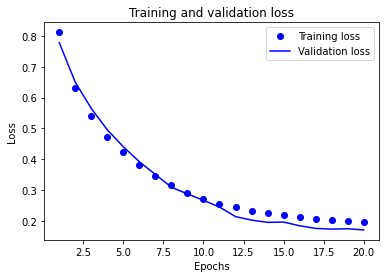

In [50]:
plotLossVal(loss, val_loss)

The plot shows that the 'small model' continuously lower losses on both training data and validation data. Though the model beats the baseline, **we conclude that the 'small model' underfits the training data**. So we cannot generalise this model and use it on the test data.

 ### 5.7 Create a model that overfits
 
We aim to create an ideal model and it stands right at the border between underfitting and overfitting, under capacity and over capacity. We put the statistical power of the model to test by creating an overfitting model. So we can regularize and tune the model and work towards creating an ideal model.

Steps to create an overfitting model:

1. Add more layers<br>
2. Create bigger layers<br>
3. Use more epochs<br>

In [54]:
# the overfitting
def overfitModel(hidden_layer_dim):
    # sequential model
    model = models.Sequential()
    # input layer with shape
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    # dense hidden layer with parameterized units
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, activation='relu'))
    # output layer - 1 unit as it is a regression model
    model.add(layers.Dense(1))
    # configure the model: rmsprop with default leatning rate (0.001), loss = mean squared error
    # metrics - mean absolute error for the regression model
    model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
    return model

In [77]:
# pass a tuple (64, 64, 64, 64)
# 4 dense layers with 64 units each
model_overfit = overfitModel((128,128,))
# Train the model on a larger batch size (512) and epoch (100)
# validation set is passed
history_overfit = model_overfit.fit(partial_train_data, partial_train_target,
                                validation_data=(val_data, val_target),
                                epochs=50, batch_size=512)

Epoch 1/50
3/3 [==============================] - 1s 127ms/step - loss: 0.6217 - mae: 0.5696 - val_loss: 0.4484 - val_mae: 0.4324
Epoch 2/50
3/3 [==============================] - 0s 18ms/step - loss: 0.3184 - mae: 0.4012 - val_loss: 0.2445 - val_mae: 0.3335
Epoch 3/50
3/3 [==============================] - 0s 20ms/step - loss: 0.2248 - mae: 0.3187 - val_loss: 0.2751 - val_mae: 0.3189
Epoch 4/50
3/3 [==============================] - 0s 19ms/step - loss: 0.2165 - mae: 0.2988 - val_loss: 0.1926 - val_mae: 0.3220
Epoch 5/50
3/3 [==============================] - 0s 22ms/step - loss: 0.1959 - mae: 0.2957 - val_loss: 0.1712 - val_mae: 0.2611
Epoch 6/50
3/3 [==============================] - 0s 21ms/step - loss: 0.1795 - mae: 0.2618 - val_loss: 0.1990 - val_mae: 0.2637
Epoch 7/50
3/3 [==============================] - 0s 18ms/step - loss: 0.1745 - mae: 0.2557 - val_loss: 0.1618 - val_mae: 0.2883
Epoch 8/50
3/3 [==============================] - 0s 19ms/step - loss: 0.1708 - mae: 0.2614 - va

In [89]:
# store both loss values from the history object
loss = history_overfit.history['loss']
val_loss = history_overfit.history['val_loss']

In [97]:
val_mae = history_overfit.history['val_mae']
print("Holdout validation")
print("Model Loss: ", np.min(val_loss))
print("Model MAE: ", val_mae[np.argmin(val_loss)])

Holdout validation
Model Loss:  0.14840173721313477
Model MAE:  0.24580542743206024


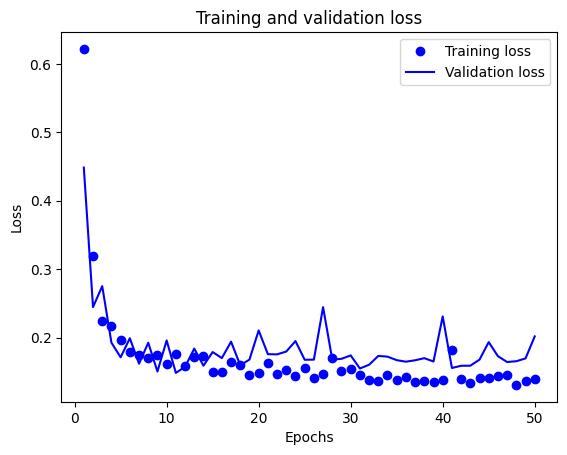

In [80]:
plotLossVal(loss, val_loss)

If you check the training log and the plot above, **the validation loss reaches its minimum at epoch 11 and then starts to increase. The training loss continues to fall and reaches 0.1308 at the 48th epoch with a higher validation loss.** This proves that after the 11th epoch the model starts overfitting. Let's check the total trainable parameters below.

In [72]:
# model summary
model_overfit.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1536      
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 1)                 129       
                                                                 
Total params: 18,177
Trainable params: 18,177
Non-trainable params: 0
_________________________________________________________________


Based on the idea of this model, we start the hyperparameter tuning to create an ideal model. 

### 5.7 Hyperparameter tuning

Hyperparameters of a model are all its non-trainable parameters (number of layers, number of units in a layer, learning rate, optimizer etc). We tune the hyperparameters considering their effect on the validation data set. With the right hyperparameters, the model performance will increase, and we will be able to evaluate it on the test data and generalise the model.

**We use python's SciKeras library** [6, SciKeras], and it supports the use of Tensorflow and Keras with scikit learn. The SciKeras offers a wrapper called **'KerasRegressor'**, it is a **scikit-learn regressor API for Keras**. We can train the model using the KerasRegressor. 

Another great advantage of SciKeras is that we can implement **scikit learn's GridSearchCV**. We can specify the hyperparameters and use GridSearchCV to exhaustively search over the dataset to find the best parameter. It also implements **K-Fold cross-validation** to better evaluate the hyperparameters.

**First, we tune a few hyperparameters and the epochs to build an overfitting model. Further tuning will be done on the overfitting model.**

In [65]:
# Hyperparameter tuning [7, machinelearningmastery.com]
# No code is directly compied from machinelearningmastery.com
# install scikeras
!pip install scikeras

### 5.7.1. Tune Batch size and epochs 
**Epochs is not a hyperparameter**

Use KerasRegressor and GridSearchCV to find the batch size and number of epochs.

In [101]:
# load the libraries tensorflow,keras
import tensorflow as tf
import keras
import numpy as np
# load KerasRegressor and GridSearchCV
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

**From here onwards, we are not commenting on every line of the code for model building as it is already done before.**

In [107]:
# create the model with default optimizer and metrics
def modelFour(hidden_layer_dim, optimizer='rmsprop', activation = 'relu'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, activation=activation))
    model.add(layers.Dense(1))
    model.compile(optimizer = "rmsprop", loss = 'mse', metrics = ['mae'])
    return model

**Use KerasRegressor, the scikit-learn regressor API for Keras**

In [108]:
# pass the model, layer units etc
model_small_BE = KerasRegressor(modelFour,
                                loss="mse",
                                activation='relu',
                                optimizer="rmsprop",
                                hidden_layer_dim=(128,128,), # same as the overfitting model
                                epochs=50,
                                batch_size = 512,
                                verbose=False,)
# train the regressor
model_small_BE.fit(train_data, train_target)

KerasRegressor(
	model=<function modelFour at 0x000002859C899700>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=mse
	metrics=None
	batch_size=512
	validation_batch_size=None
	verbose=False
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	activation=relu
	hidden_layer_dim=(128, 128)
)

**Now, use GridSearchCV to find the best batch size and epoch. We use 4-fold cross-validation here.**

We use neg_mean_absolute_error (negative of MAE) to evaluate the performance of cross-validation.

In [109]:
# declare the parameters
params = {
    "batch_size": [16, 32, 64, 128, 256, 512],
    "epochs": [10, 20, 50, 100],
}
# grid search to find the best parameters
gs = GridSearchCV(model_small_BE, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
# run the fit method with all set of params
gs.fit(train_data, train_target)
# print the best params 
print(gs.best_score_, gs.best_params_)

-0.22911679524519699 {'batch_size': 256, 'epochs': 20}


The best parameters are given below.

**'batch_size': 256, 'epochs': 20, MAE: 0.2291**

### 5.7.2. Tune optimizer algorithms

We are using the 'RMSprop' optimizer with the default learning rate (0.001). Let's tune the optimizer algorithm and find the best algorithm to train the network. Usually, we use 'rmsprop' or 'adam' for regression models. Let's add the best batch size (256) and epochs (20) identified in the last step to the KerasRegressor.

In [110]:
# create model
def modelFive(hidden_layer_dim, optimizer="rmsprop", activation='relu'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, activation=activation))
    model.add(layers.Dense(1,))
    model.compile(optimizer=optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [118]:
model_small_OP = KerasRegressor(modelFive,
                                loss="mse",
                                activation='relu',
                                hidden_layer_dim=(128,128,),
                                epochs=20, # change epochs to 20
                                batch_size=256, # add new batch size
                                verbose=False,)
model_small_OP.fit(train_data, train_target)
# optimizers
params = {
    "optimizer": ["adam", "rmsprop", "SGD"],
}
# gridsearch with cross validation
gs = GridSearchCV(model_small_OP, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
# result
print(gs.best_score_, gs.best_params_)

-0.22930516912056825 {'optimizer': 'adam'}


The best optimizer is given below.

**'Optimizer': adam, MAE: 0.2293**

### 5.7.3. Tune the learning rate

Let's add the optimizer identified in the previous step to the new model. Tune the learning rate of the adam optimizer using the GridSearchCV algorithm.

In [124]:
# add the tuned optimizer - adam
def modelSix(hidden_layer_dim, optimizer="adam", activation='relu'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, activation=activation))
    model.add(layers.Dense(1))
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

model_small_LR = KerasRegressor(modelSix,
                             loss="mse",
                             optimizer="adam",
                             activation='relu',
                             hidden_layer_dim=(128,128,),
                             epochs=20,
                             batch_size=256,
                             verbose=False,)
model_small_LR.fit(train_data, train_target)

params = {
    'optimizer__learning_rate': [0.0001, 0.001, 0.01, 0.1],
}
gs = GridSearchCV(model_small_LR, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
print(gs.best_score_, gs.best_params_)

-0.24935428184313274 {'optimizer__learning_rate': 0.01}


The best learning rate is given below.

**'learning rate': 0.01,  MAE: 0.2494**

### 5.7.4 Tune weight initialisation

Let's add the optimizer's learning rate tuned in the previous step to the new model. Now, tune the weight initialisation using the GridSearchCV algorithm.

In [134]:
# init_mode represents the weight initialisation 
def modelSeven(hidden_layer_dim, init_mode='uniform', activation='relu'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        # set kernel initializer
        model.add(layers.Dense(size, kernel_initializer=init_mode, activation=activation))
    model.add(layers.Dense(1, kernel_initializer=init_mode))
    # add the learning rate
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [135]:
model_small_W = KerasRegressor(modelSeven,
                               loss="mse",
                               activation='relu',
                               optimizer="adam",
                               init_mode='uniform',
                               hidden_layer_dim=(128,128,),
                               optimizer__learning_rate=0.01, # add learning rate
                               epochs=20,
                               batch_size=256,
                               verbose=False,)
model_small_W.fit(train_data, train_target)
# arameters for tuning
params = {
    "init_mode": ['uniform', 'lecun_uniform', 'lecun_normal', 'normal', 'zero', 'ones', 
                  'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform', 'variance_scaling'],
}
# gridsearch
gs = GridSearchCV(model_small_W, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
print(gs.best_score_, gs.best_params_)

-0.22817630309779918 {'init_mode': 'uniform'}


The best weight initializer is given below.

**'kernel_initializer': 'uniform', MAE: 0.2282**

### 5.7.5. Tune activation functions

Add the 'kernel_initializer': 'uniform', and tune the activation functions in this step. The activation function introduces non-linearity into the model's neurons. We choose the best activation function from **'relu', 'elu', 'selu', and 'gelu'.**

In [136]:
def modelEight(hidden_layer_dim, init_mode='uniform', activation='relu'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, kernel_initializer=init_mode, activation=activation))
    model.add(layers.Dense(1, kernel_initializer=init_mode))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [137]:
model_small_OPT = KerasRegressor(modelEight,
                               loss="mse",
                               activation='relu',
                               optimizer="adam",
                               init_mode='uniform',
                               hidden_layer_dim=(128,128,),
                               optimizer__learning_rate=0.01,
                               epochs=20,
                               batch_size=256,
                               verbose=False,)
model_small_OPT.fit(train_data, train_target)
# activation functions
params = {
    'activation': ['relu', 'elu', 'selu', 'gelu'],
}
# grid search
gs = GridSearchCV(model_small_OPT, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
print(gs.best_score_, gs.best_params_)

-0.24109727370067774 {'activation': 'relu'}


The best activation function is given below.

**'activation': 'relu', MAE: 0.2411**

### 5.7.6. Tune dropout regularization

Add the tuned optimizer (relu) to the model and start tuning the dropout rate. Dropout is a common and effective regularization method to fight overfitting. A dropout layer is added to the model, and a fraction of its output is zeroed.

In [139]:
# create model
def modelNine(hidden_layer_dim, dropout, init_mode='uniform', activation='relu'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, kernel_initializer=init_mode, activation=activation))
        # add dropout layer
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, kernel_initializer=init_mode))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [145]:
model_large_D = KerasRegressor(modelNine,
                             loss="mse",
                             activation='relu',
                             init_mode='uniform',
                             optimizer="adam",
                             hidden_layer_dim=(128,128,),
                             dropout = 0.0,
                             optimizer__learning_rate=0.01,
                             epochs=20,
                             batch_size=256,
                             verbose=False,)
model_large_D.fit(train_data, train_target)
# dropout values
params = {
    'model__dropout': [0, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.6],
}
gs = GridSearchCV(model_large_D, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
print(gs.best_score_, gs.best_params_)

-0.23561423976523324 {'model__dropout': 0.2}


The best dropout rate is given below.

**'dropout': 0.2, MAE: 0.2356**

### 5.7.7 L1 L2 Regularizer

Add the tuned dropout rate (0.2) to the model.

We use the regularization techniques to fight overfitting that occurs while training the model. It forces the layer weights to take a small value and makes the distribution of weights more regular.

We try to find the best weight regularizer from ('l1', 'l2', 'l1_l2', None). The default value used is 0.1.

In [146]:
# create model
def modelTen(hidden_layer_dim, dropout=0.2, init_mode='uniform', activation='relu', regularizer='l1_l2'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, kernel_initializer=init_mode, kernel_regularizer=regularizer, activation=activation))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, kernel_initializer=init_mode, kernel_regularizer=regularizer))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [155]:
model_large_REG = KerasRegressor(modelTen,
                             loss="mse",
                             activation='relu',
                             init_mode='uniform',
                             optimizer="adam",
                             hidden_layer_dim=(128,128,),
                             dropout = 0.2,
                             regularizer='l1_l2',
                             optimizer__learning_rate=0.01,
                             epochs=20,
                             batch_size=256,
                             verbose=False,)
model_large_REG.fit(train_data, train_target)

params = {
    'regularizer': ['l1', 'l2', 'l1_l2', None],
}
gs = GridSearchCV(model_large_REG, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
print(gs.best_score_, gs.best_params_)

-0.2407896702621896 {'regularizer': 'l2'}


The best weight regularizer is given below.

**'regularizer': 'l2', MAE: 0.2401**

### 5.7.8.Tune the hidden layer size and number

The number of hidden layers and their size represents the capacity of the model. We started hyperparameter tuning with an overfitting model, and now it's time to apply the best hyperparameter values and find the ideal number of layers and size.

We use grid search with cross-validation to select the ideal capacity that stands on the border between underfitting and overfitting. **The tuple length represents the length of the layers, and the elements represent the size of the layer (unit value).**

In [156]:
# create the model with all the other tuned hyperparameters
def modelEleven(hidden_layer_dim, dropout=0.2, init_mode='uniform', activation='relu', regularizer='l2'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, kernel_initializer=init_mode, kernel_regularizer=regularizer, activation=activation))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, kernel_initializer=init_mode, kernel_regularizer=regularizer))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [157]:
model_large_SIZE = KerasRegressor(modelEleven,
                                  loss="mse",
                                  activation='relu',
                                  init_mode='uniform',
                                  optimizer="adam",
                                  hidden_layer_dim=(128,128,), # input the overfitting capacity
                                  dropout = 0.2,
                                  regularizer='l2',
                                  optimizer__learning_rate=0.01,
                                  epochs=20,
                                  batch_size=256,
                                  verbose=False,)
model_large_SIZE.fit(train_data, train_target)
# select from underfitting to overfitting layer capacities
params = {
    'model__hidden_layer_dim': [(128,128,), (128,64,), (128,32,), (128,16,), (128,8,), (128,), (64,64,), (64,)],
}
# gridsearch
gs = GridSearchCV(model_large_SIZE, params, refit=False, cv=4, scoring='neg_mean_absolute_error')
gs.fit(train_data, train_target)
print(gs.best_score_, gs.best_params_)

-0.2441292619295738 {'model__hidden_layer_dim': (128,)}


The tuning result as follows

**Layer dimension: (128,), Number of layers:1 (length of the tuple), MAE: 0.2441**

**With the capacity (layer numbers and size) tuning, we conclude our hyperparameter tuning and move on to build a balanced production model that can handle real-time problems.**

### 5.8. Balanced Final Production Model

Apply all the hyperparameters tuned from section 5.7.1 to 5.7.8 and develop the final model. After validation, we decide whether it is eligible to consider as our production model.

In [251]:
# create model applyting all the best hyperparameters
def modelTwelve(hidden_layer_dim, dropout=0.2, init_mode='uniform', activation='relu', regularizer='l2'):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape = (train_data.shape[1], )))
    for size in hidden_layer_dim:
        model.add(layers.Dense(size, kernel_initializer=init_mode, kernel_regularizer=regularizer, activation=activation))
        model.add(layers.Dropout(dropout))
    model.add(layers.Dense(1, kernel_initializer=init_mode, kernel_regularizer=regularizer))
    optimizer = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(optimizer = optimizer, loss = 'mse', metrics = ['mae'])
    return model

In [252]:
# Train the model (in silent mode, verbose=0)
# add the new layer capacity (number and size)
model_balanced = modelTwelve((128, )) 
history_balanced = model_balanced.fit(partial_train_data, partial_train_target,
                                validation_data=(val_data, val_target),
                                epochs=20, batch_size=256, verbose=False)

### 5.8.1 Production model validation - Hold out method

In [253]:
loss = history_balanced.history['loss']
val_loss = history_balanced.history['val_loss']

In [254]:
val_mae = history_balanced.history['val_mae']
print("Holdout validation")
print("Balanced Model Loss: ", np.min(val_loss))
print("Balanced Model MAE: ", val_mae[np.argmin(val_loss)])

Holdout validation
Balanced Model Loss:  0.18209147453308105
Balanced Model MAE:  0.2590906620025635


**The hold-out validation of the balanced model seems good, let's plot the training and validation losses to get an idea about the overall performance.**

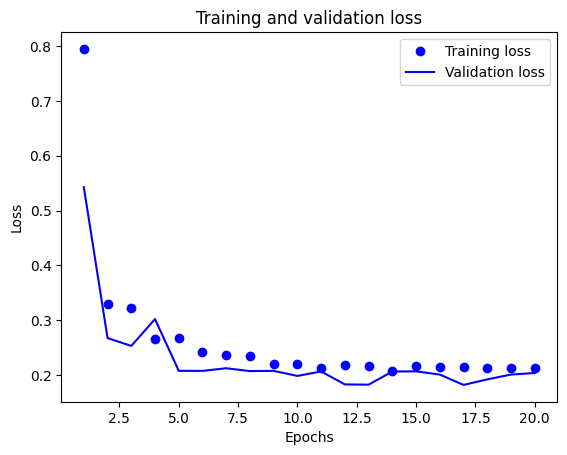

In [255]:
# plot the training and validation losses
plotLossVal(loss, val_loss)

**The plot doesn't give any evidence for overfitting anymore, and the MAE (Hold-out) is better than the underfitting model (section 5.6).**

In [256]:
# check the best validation loss and the corresponding epoch
np.argmin(val_loss)

16

### 5.8.2 Production model validation - K-Fold method

Let's apply K-Fold validation to further analyse the performance of the balanced model.

In [231]:
# K-Fold validation
average_mae_history, average_val_loss_history, baseline_epoch = kFold(4, train_data, train_target, model_balanced)

processing fold 0
processing fold 1
processing fold 2
processing fold 3


In [232]:
print("K-Fold validation")
print("Balanced Model Loss: ", average_val_loss_history[baseline_epoch])
print("Balanced Model MAE: ", average_mae_history[baseline_epoch])

K-Fold validation
Balanced Model Loss:  0.19361986592411995
Balanced Model MAE:  0.24870898574590683


The mean absolute error metric looks stable on both holdout and K-Fold validation. **Let's consider it as the production model, train the model on the available training data and evaluate it on the unseen data to determine how effective this model is.**

In [233]:
# check the summary
model_balanced.summary()

Model: "sequential_1528"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4346 (Dense)          (None, 128)               1536      
                                                                 
 dropout_920 (Dropout)       (None, 128)               0         
                                                                 
 dense_4347 (Dense)          (None, 1)                 129       
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


## 6. Performance on Test Data (Unseen dataset)

The validation of the production model is done in the above step. Now, let's train the production model on all the available training data (training + validation data) and evaluate it on the test data.

In [257]:
# find the best epoch (lowest validation loss)
ep = np.argmin(val_loss)
ep

16

In [258]:
# train the model with all the available data
# add the best epoch value and batch size
model_test = modelTwelve((128, ))
history_test = model_test.fit(train_data, train_target,
                                epochs=ep, batch_size=256, verbose=False)

Now it is time for the most important step in deep learning model development, that is, to evaluate the performance of the model on the unseen dataset (test data). **We need a better performance on the unseen dataset (than the above validation) to conclude that our dataset selection, preprocessing, feature selection, tuning, validation, and hypothesis are correct.** If we get a performance that is lower than the training set validation, we should reconsider the validation process, feature selection, apply dimensionality reduction and feature engineering etc.

In [259]:
test_loss, test_acc = model_test.evaluate(test_data, test_target)

5/5 [==============================] - 1s 3ms/step - loss: 0.1790 - mae: 0.2348


**The MAE obtained (0.2348) on the unseen data is better than the hold out (0.2491) and K-Fold validation (0.2487). The performance of our model on the test data is better than the validation (section 5.8.2), and we developed a production model that is eligible to handle real-world problems. It proves our hypothesis is true and validation methods are reliable.**

In [238]:
# production model summary
model_test.summary()

Model: "sequential_1529"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4348 (Dense)          (None, 128)               1536      
                                                                 
 dropout_921 (Dropout)       (None, 128)               0         
                                                                 
 dense_4349 (Dense)          (None, 1)                 129       
                                                                 
Total params: 1,665
Trainable params: 1,665
Non-trainable params: 0
_________________________________________________________________


## 7. Results

### 7.1. Workflow

We followed the deep learning workflow given in the book Deep Learning With Python by Francois Chollet. The main goal was to develop a model with sufficient and limited capacity. A low-capacity model will underfit the training dataset and a high-capacity model will fail to generalise. We did extensive experiments and tuning to develop a balanced production model that stands right at the border between optimization and generalization.

### 7.2. Occam's razor principle

We followed Occam's principle in machine learning which prefers a simpler model with fewer trainable parameters over complex models. It is a heuristic that states complex hypotheses make more assumptions and fails to generalize. As a result, we chose a simpler model as our production model. 

### 7.3 Performance of the production model

We do a holdout validation and K-Fold validation to better understand the performance of the production model on a validation dataset. The validation results obtained are given below.

Hold out validation<br>
Production Model Validation Loss:  0.18209147453308105<br>
Production Model MAE:  0.2590906620025635<br>

K-Fold validation<br>
Production Model  Validation Loss:  0.19361986592411995<br>
Production Model MAE:  0.24870898574590683

As it is a regression model, we use the metrics 'Mean absolute error' to determine the performance of the model. The production model gives us a balanced performance compared to underfitting and overfitting models.

### 7.3.1 Train the model on available data (Training + Validation data) and Evaluate on Test data

**First, we train the production model on the available training data, that is the combination of training and validation data. The final evaluation is done on the test data (unseen dataset).**

**The evaluation on the unseen dataset performed better than the production model validation, the results are as follows.**

**Model Evaluation on unseen dataset (Test data)**<br>
Mean Squared Error (loss): 0.1790<br>
Mean Absolute Error (MAE): 0.2348

The MAE obtained (0.2348) is better than the hold out (0.2491) and K-Fold validation (0.2487).

**The result (MAE) shows that our validation procedure was reliable, production model is ready for deployment, and able to handle real-time data.** It may require timely optimization and maintenance to keep the level of performance for a long period.

## 8. Conclusions

### 8.1 Hypothesis

Based on the experiments, **we got enough evidence to support the hypothesis**, and the individual's age, sex, BMI, smoking habit, and region data can be used to predict the medical costs billed by the insurer.

### 8.2. Size of the dataset and deep learning

As a rule of thumb, we use the ten times rule to determine the size of the dataset. You should have samples at least 10 times the number of features. If the features are not good, any dataset is irrelevant. Here we had 12 features and 1200 samples for training, and the results showed the feature selection was good enough. 

We did not use feature engineering because the features and sample size we chose already produced a good performance on the production data. As deep learning networks have a larger hypothesis space and it is less dependent on feature engineering. **The result showed that feature engineering is not always required for deep learning models.**

### 8.3. Further Development

We can deploy the model as part of a mobile or web application or make the service available as an API to handle real-world problems. In the long term, the concept drift may affect the performance of the model. It is the change in the properties of production data over time. 

To tackle concept drift and performance decay, we should collect real-world data, annotate, and retrain the model often. **The future won't behave like the past all the time, and we should be ready to train the next generation of the model as soon as we deploy it.**

## 9. Reference

1. The national health expenditure, Centers for Medicare & Medicaid Services, 2020
https://www.cms.gov/Research-Statistics-Data-and-Systems/Statistics-Trends-and-Reports/NationalHealthExpendData/NHE-Fact-Sheet

2. Journal of the American Medical Association, 2017 
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5818797/

3. The Peterson-Kaiser Family Foundation Health System Tracker
https://www.healthsystemtracker.org/brief/an-early-look-at-what-is-driving-health-costs-in-2023-aca-markets/

4. Medical Cost Personal Dataset, Kaggle, 2018 
https://www.kaggle.com/datasets/mirichoi0218/insurance

5. License: Database Contents License (DbCL) v1.0
https://opendatacommons.org/licenses/dbcl/1-0/

6. SciKeras: https://www.adriangb.com/scikeras/stable/quickstart.html#training-a-model
https://www.adriangb.com/scikeras/stable/notebooks/MLPClassifier_MLPRegressor.html

7. Hyperparameter tuning 
https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/

8. Tensorflow, Keras, Regression
https://www.tensorflow.org/tutorials/keras/regression